Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [6]:
titanic_data = pd.read_csv('train.csv')
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

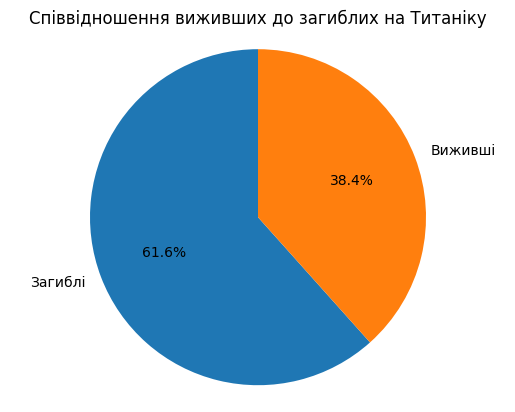

In [9]:
survived_counts = titanic_data['Survived'].value_counts()

labels = ['Загиблі', 'Виживші']
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Співвідношення виживших до загиблих на Титаніку')
plt.axis('equal')  # Забезпечує круглу форму діаграми
plt.show()

Простий та зрозумілий спосіб відображення цієї інформації дозволяє швидко сприйняти основну тенденцію: у даному наборі даних більшість пасажирів загинула, оскільки сектор, що відповідає загиблим, більший за сектор виживших. Відсоткові значення, що вказані на діаграмі, також допомагають краще зрозуміти пропорції між категоріями.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


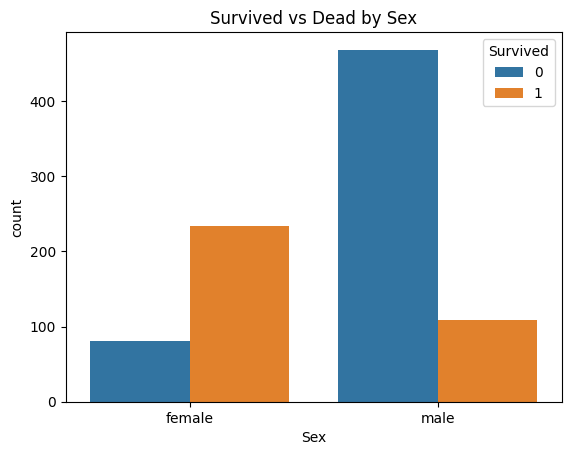

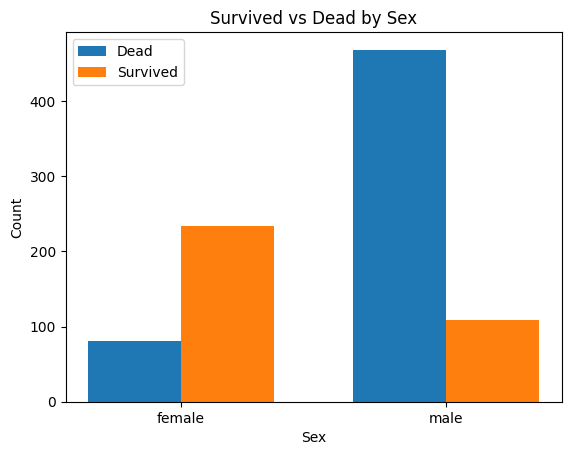

In [19]:
survived_by_sex = titanic_data.groupby(['Sex', 'Survived']).size().unstack()

# Створюємо барчарт
bar_width = 0.35
index = np.arange(len(survived_by_sex.index))
plt.bar(index, survived_by_sex[0], bar_width, label='Dead')
plt.bar(index + bar_width, survived_by_sex[1], bar_width, label='Survived')

# Додаємо підписи на вісі x та легенду
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survived vs Dead by Sex')
plt.xticks(index + bar_width / 2, survived_by_sex.index)
plt.legend()

plt.show()

Діаграма наглядно демонструє, що серед жінок виживших було значно більше, ніж загиблих, в той час як серед чоловіків було значно менше виживших, ніж загиблих. Це відображає загальну тенденцію на Титаніку, коли пріоритет надавався евакуації жінок і дітей.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

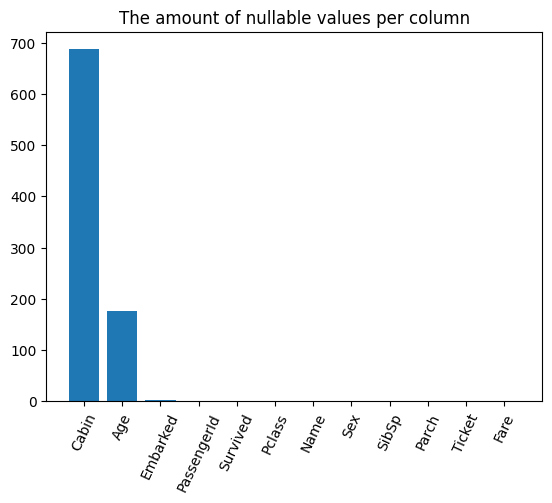

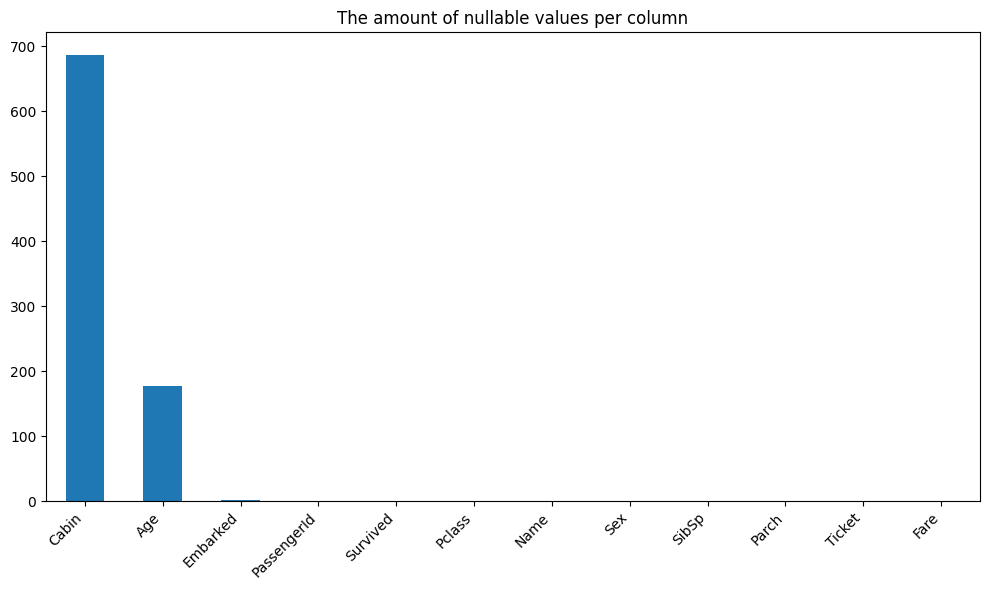

In [23]:
missing_values = titanic_data.isnull().sum().sort_values(ascending=False)

# Створення стовпчастої діаграми
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('The amount of nullable values per column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


На графіку можна побачити, що змінні Cabin i Age мають найбільшу кількість пропущених значень. Більш високі стовпці вказують на те, що для відповідних змінних є більше пропущених значень.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

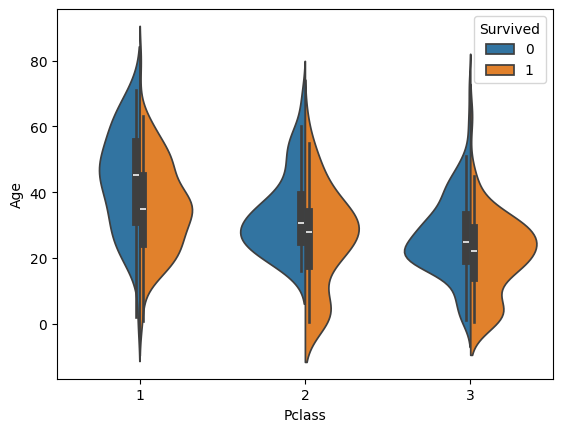

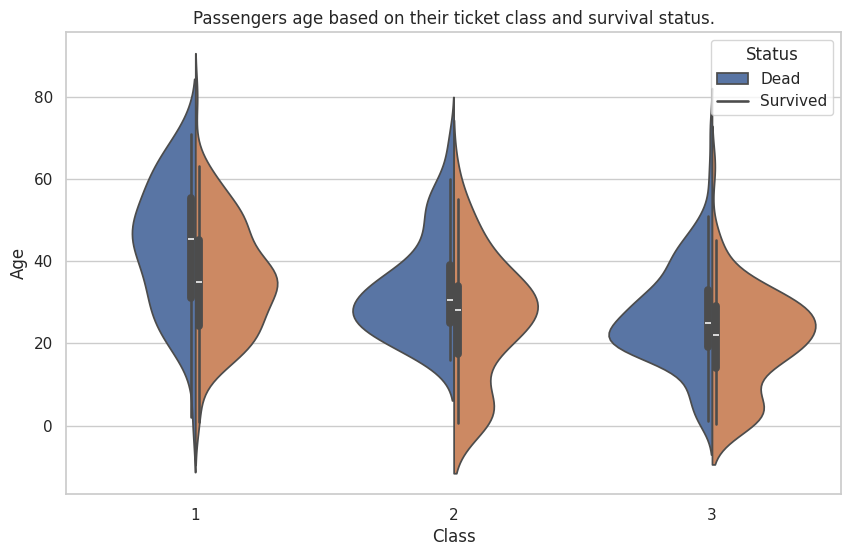

In [28]:
import seaborn as sns

# Встановлюємо тему для графіку
sns.set_theme(style="whitegrid")

# Побудова violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=titanic_data, x='Pclass', y='Age', hue='Survived', split=True)
plt.title('Passengers age based on their ticket class and survival status.')
plt.xlabel('Class')
plt.ylabel('Age')
plt.legend(title='Status', labels=['Dead', 'Survived'])
plt.show()


Для кожного класу квитка (1-й, 2-й, 3-й) та кожного статусу виживання (загинув або вижив), залозиста область відображає розподіл віку пасажирів. Ширший ділянка відповідає більшій кількості пасажирів у відповідному віковому діапазоні, тоді як вузька ділянка вказує на меншу кількість спостережень у цьому діапазоні.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


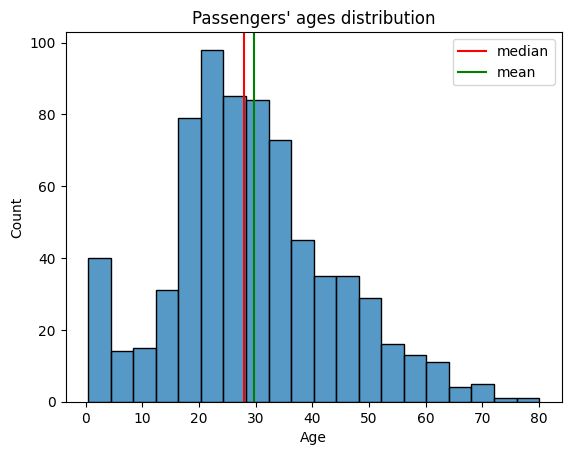

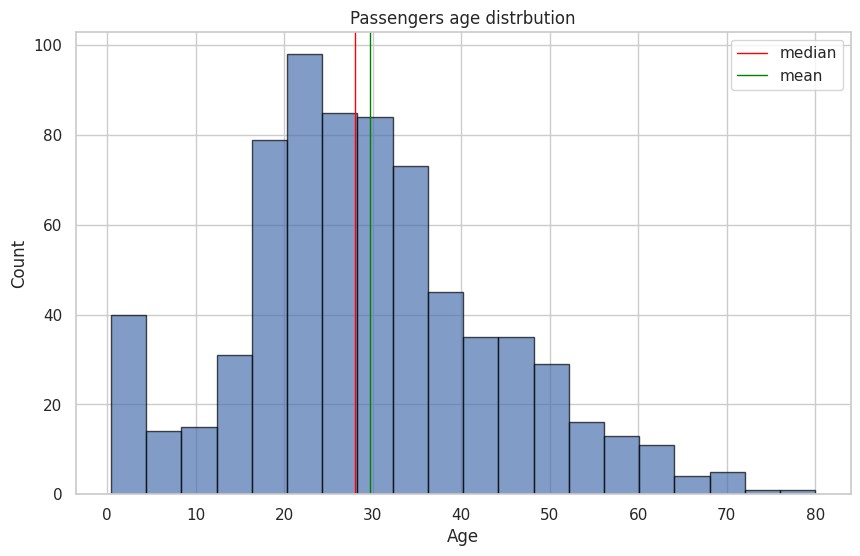

In [31]:
# Вибираємо вік пасажирів, виключаючи пропущені значення
age_data = titanic_data['Age'].dropna()

# Розрахунок медіани та середнього значення
median_age = age_data.median()
mean_age = age_data.mean()

# Побудова гістограми
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=20, edgecolor='black', alpha=0.7)

# Додавання ліній для медіани та середнього значення
plt.axvline(median_age, color='red', linewidth=1, label='median')
plt.axvline(mean_age, color='green', linewidth=1, label='mean')

# Додавання легенди
plt.legend()

# Додавання заголовку та підписів вісей
plt.title('Passengers age distrbution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()


Ця візуалізація дозволяє швидко отримати уявлення про розподіл віку пасажирів на Титаніку. Ми можемо побачити, як вік розподілений серед пасажирів та визначити середнє та медіанне значення, що допомагає зрозуміти типові вікові характеристики пасажирів.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Бізнес-питання: Як впливає клас квитка на шанси виживання пасажирів на Титаніку?

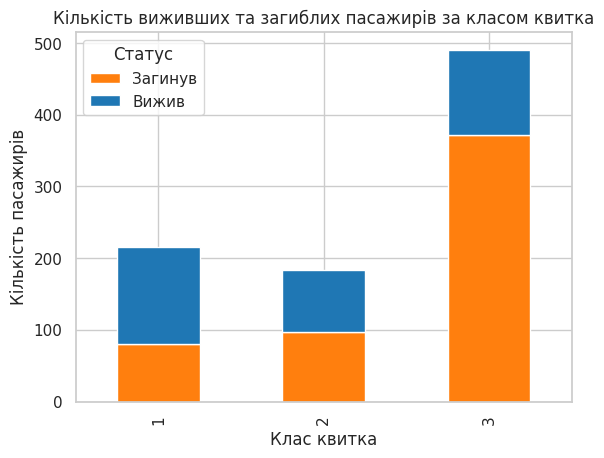

In [32]:
# Групуємо дані за класом квитка та статусом виживання
survival_by_class = titanic_data.groupby(['Pclass', 'Survived']).size().unstack()

# Створюємо стовпчасту діаграму
survival_by_class.plot(kind='bar', stacked=True, color=['#ff7f0e', '#1f77b4'])

# Додаємо легенду
plt.legend(['Загинув', 'Вижив'], title='Status')

# Додаємо підписи вісей та заголовок
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Кількість виживших та загиблих пасажирів за класом квитка')

# Відображаємо графік
plt.show()


Пасажири 2-го класу мали найвищі шанси на виживання, оскільки кількість виживших перевищує кількість загиблих у цьому класі.

Пасажири 3-го класу мали найнижчі шанси на виживання, оскільки кількість загиблих перевищує кількість виживших у цьому класі.

Пасажири 1-го класу також мали менші шанси на виживання, але відношення виживших до загиблих було трохи кращим, ніж у пасажирів 3-го класу.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

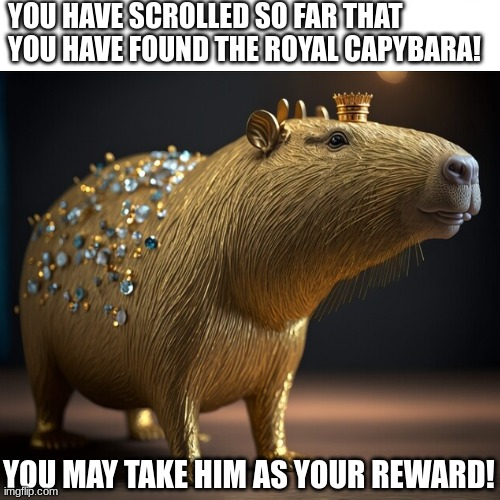